In [16]:
import numpy as np
import pandas as pd

np.random.seed(42)

ROWS = 12000

# CGPA ~ N(7, 0.55)
cgpa = np.random.normal(7, 0.55, ROWS)
cgpa = np.clip(cgpa, 4, 10)
cgpa = np.round(cgpa, 2)

# Marks correlated with CGPA
marks = cgpa * 10 + np.random.normal(0, 5, ROWS)
marks = np.clip(marks, 0, 100)
marks = np.round(marks, 2)

# Placement logic
placed = (cgpa >= 6.5).astype(int)

df = pd.DataFrame({
    "cgpa": cgpa,
    "marks": marks,
    "placed": placed
})

# ---------- Controlled Outliers ----------
outliers = pd.DataFrame({
    "cgpa":  [9.8, 1.2, 10, 0.8, 2.0, 9.7],
    "marks": [25, 95, 100, 10, 98, 30],
    "placed":[0, 1, 1, 0, 1, 0]
})

df = pd.concat([df, outliers], ignore_index=True)

df.to_csv("placement_std05.csv", index=False)

print(data.describe())


               cgpa         marks        placed
count  12008.000000  12008.000000  12008.000000
mean       6.975313     69.666691      0.576782
std        1.732874     18.028253      0.494090
min        0.500000      5.000000      0.000000
25%        5.480000     54.857500      0.000000
50%        6.960000     69.650000      1.000000
75%        8.470000     84.762500      1.000000
max       10.000000    100.000000      1.000000


In [17]:
df

,cgpa,marks,placed
0,7.27,78.57,1
1,6.92,59.81,1
2,7.36,71.96,1
3,7.84,78.19,1
4,6.87,68.78,1
...,...,...,...
12001,1.20,95.00,1
12002,10.00,100.00,1
12003,0.80,10.00,0
12004,2.00,98.00,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='marks', ylabel='Density'>

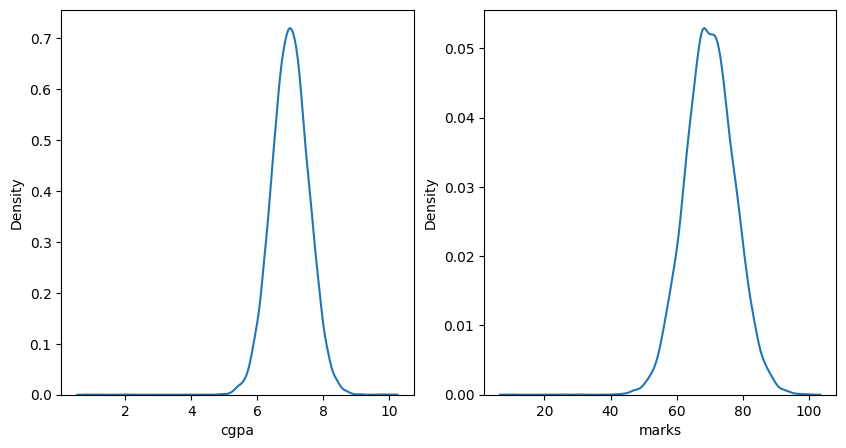

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(df["cgpa"])
plt.subplot(1, 2, 2)
sns.kdeplot(df["marks"])

In [20]:
print('mean value of cgpa', df['cgpa'].mean())
print('std value of cgpa', df['cgpa'].std())
print('min value of cgpa', df['cgpa'].min())
print('max value of cgpa', df['cgpa'].max())


mean value of cgpa 6.995996168582375
std value of cgpa 0.5598606981366888
min value of cgpa 0.8
max value of cgpa 10.0


In [21]:
#finding boundary values
print('highest allowed', (df['cgpa'].mean() + 3*df['cgpa'].std()))
print('lowest allowed', df['cgpa'].mean() - 3*df['cgpa'].std())

highest allowed 8.675578262992442
lowest allowed 5.316414074172308


In [26]:
# finding the outliers based on the capped statistical boundaries
outliers_df = df[(df['cgpa'] > 8.67) | (df['cgpa'] < 5.31)]
print("Outliers based on CGPA:")
print(outliers_df)

Outliers based on CGPA:
        cgpa   marks  placed
209     9.12   85.76       1
262     5.22   57.76       0
478     8.69   89.57       1
1615    8.76   88.28       1
1957    8.73   91.42       1
2305    8.71   83.62       1
2895    9.16   94.54       1
3716    8.78   91.77       1
3982    8.73   93.34       1
4725    5.26   52.59       0
4779    5.25   52.13       0
4870    8.69   82.03       1
4997    8.71   97.75       1
5796    8.70   83.22       1
6891    8.94   91.11       1
7140    5.23   57.73       0
7223    8.71   91.44       1
7611    4.97   50.91       0
7677    5.02   53.15       0
8024    5.27   48.03       0
8180    5.22   44.87       0
8200    4.89   46.96       0
8248    8.86   87.89       1
8726    8.74   93.21       1
9770    4.84   56.91       0
10735   5.22   50.85       0
11180   5.14   49.24       0
11338   8.86   83.27       1
11426   5.17   60.77       0
11464   8.81   87.72       1
12000   9.80   25.00       0
12001   1.20   95.00       1
12002  10.00  100.0

In [27]:
new_df = df[(df['cgpa'] < 8.67) & (df['cgpa'] > 5.31)]

In [28]:
new_df.shape

(11970, 3)

In [29]:
df.shape

(12006, 3)